## Weather Prediction (Classification)
---

In [38]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Preprocessing
---

In [39]:
#load data
data = pd.read_csv("data/weather_data.csv")

# associate summary with int (label encoding)
def LABEL_ENCODING(col):
    label_encoder = preprocessing.LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])
    data[col].unique()
LABEL_ENCODING("Summary")

# drop columns

x = data.drop(["Formatted Date", "Precip Type", "Apparent Temperature (C)", "Loud Cover", "Daily Summary"], axis=1)

y = data["Summary"]

# split in train/test (.75/.25)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(X_train.head(5))

# save X_test as csv
filepath = "data/sensor_data.csv"
X_test.to_csv(filepath)

# feature scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
print(X_train[2000:])
print(len(X_train[0]))
X_test = scaler.transform(X_test)


       Summary  Temperature (C)  Humidity  Wind Speed (km/h)  \
43304       17        15.905556      0.93             9.3219   
25864       17        11.266667      0.78            13.7333   
59948       17        18.816667      0.93             0.1449   
38011       18         3.666667      0.93            13.7816   
75480       17         7.800000      0.79            13.4435   

       Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  
43304                   164.0           5.5384               1013.33  
25864                    79.0          10.0464               1019.17  
59948                     0.0           9.9820               1017.27  
38011                   307.0           3.3810               1009.51  
75480                   181.0          15.8263               1012.60  
[[0.23076923 0.72234722 0.65       ... 0.39832869 0.964      0.97635891]
 [0.65384615 0.51552516 0.83       ... 0.97493036 0.7        0.965241  ]
 [0.73076923 0.55674557 0.64       ... 0.86

### Train/Predict
---

In [41]:
# logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/logistic_regression.sav'
pickle.dump(classifier, open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_log_reg}")

Accuracy score: 0.9373807746537282


/Users/marvinkronsbein/opt/miniconda3/envs/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# svm 
classifier = SVC(kernel="linear", random_state=0)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/svm.sav'
pickle.dump(classifier, open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_svm}")

Accuracy score: 0.993696607779713


In [43]:
# knn
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/knn.sav'
pickle.dump(classifier, open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_knn}")

Accuracy score: 0.9072737828647259


In [44]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# save the model
filename = 'models/naive_bayes.sav'
pickle.dump(classifier, open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_bayes = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_bayes}")

Accuracy score: 0.9999170606286805


In [46]:
classifier = RandomForestClassifier(n_estimators=40, random_state=0)
classifier.fit(X_train, y_train)

# save the model
filename = 'models/random_forest.sav'
pickle.dump(classifier, open(filename, 'wb'))

# predict
y_pred = classifier.predict(X_test)
acc_rf = classifier.score(X_test,y_test)
print(f"Accuracy score: {acc_rf}")

Accuracy score: 0.9995853031434022


### Visualize Model Accuracy
---

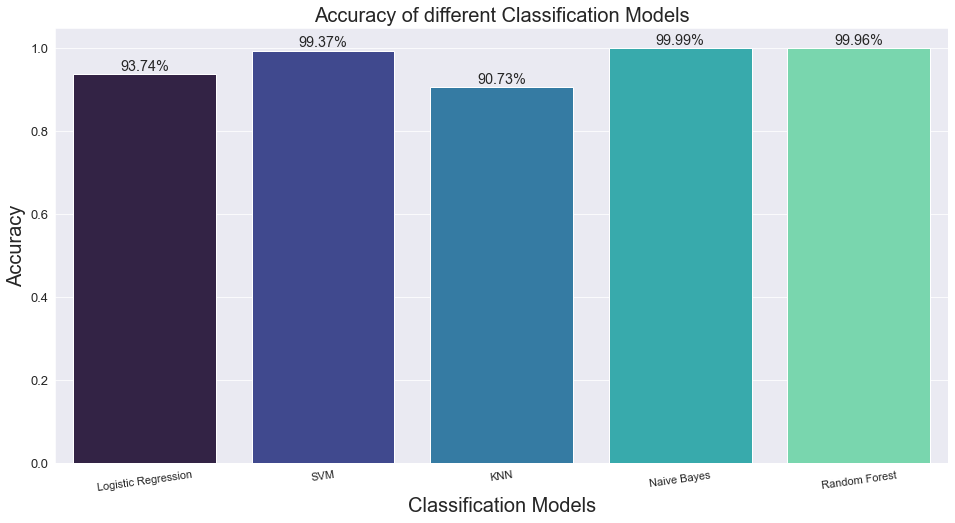

In [47]:
accuracy_scores=[
    acc_log_reg
    ,acc_svm
    ,acc_knn
    ,acc_bayes
    ,acc_rf
]

labels=[
    "Logistic Regression"
    ,"SVM"
    ,"KNN"
    ,"Naive Bayes"
    ,"Random Forest"
]

# plot params / plotting
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
ax = sns.barplot(x=labels, y=accuracy_scores, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center', fontsize = 'x-large')
plt.show()